# Importing the libraries

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Preprocessed_Online_Payment_Data.csv")

# Drop columns that are not needed for training
data = data.drop(["nameOrig", "nameDest"], axis=1, errors="ignore")  # Example column names

# Separate features and target
X = data.drop("isFraud", axis=1)  # Adjust with your target column
y = data["isFraud"]

# Handle categorical features using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
from tensorflow.keras.layers import BatchNormalization


In [7]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# Model Fit 

In [9]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, callbacks=[early_stopping])


Epoch 1/20
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7497 - loss: 0.5182 - val_accuracy: 0.8795 - val_loss: 0.2925
Epoch 2/20
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8541 - loss: 0.3137 - val_accuracy: 0.8929 - val_loss: 0.2563
Epoch 3/20
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8740 - loss: 0.2759 - val_accuracy: 0.8929 - val_loss: 0.2338
Epoch 4/20
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8882 - loss: 0.2571 - val_accuracy: 0.9084 - val_loss: 0.2126
Epoch 5/20
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8947 - loss: 0.2388 - val_accuracy: 0.9236 - val_loss: 0.2024
Epoch 6/20
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9048 - loss: 0.2192 - val_accuracy: 0.9394 - val_loss: 0.1667
Epoch 7/20
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9160 - loss: 0.1988 - val_accuracy: 0.9422 - val_loss: 0.1539
Epoch 8/20
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9250 - loss: 0.1886 - val_accuracy: 0.

In [12]:
model.save("fraud_detection_model_final.keras")


# Model Accuracy

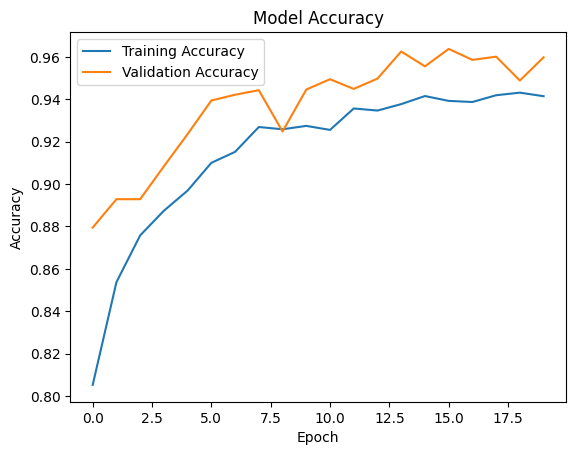

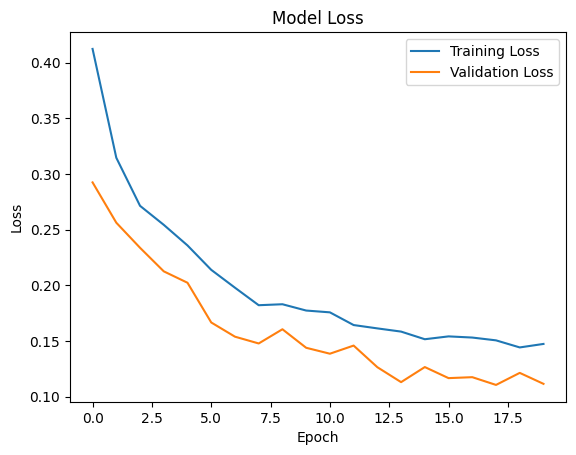

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Print Directory

In [14]:
import os

print("Current Directory:", os.getcwd())


Current Directory: c:\Users\HP\AppData\Local\Programs\Microsoft VS Code


# Add other required features to match the 12 expected by the model

In [16]:
import pandas as pd

# Example input data
input_data = {
    'Amount': [100.00],
    'Old Balance (Origin)': [500.00],
    'New Balance (Origin)': [400.00],
    'Transaction Type': ['CASH_IN'],
    # Add other required features to match the 12 expected by the model
}

# Convert the input dictionary to a DataFrame
input_data_df = pd.DataFrame(input_data)


# Importing Lybrary

In [18]:
import streamlit as st


In [19]:
amount = st.number_input("Amount", value=100.00)
old_balance = st.number_input("Old Balance (Origin)", value=500.00)
new_balance = st.number_input("New Balance (Origin)", value=400.00)
transaction_type = st.selectbox("Transaction Type", options=["CASH_IN", "CASH_OUT", "DEBIT", "PAYMENT", "TRANSFER"])

# Assemble into a DataFrame
input_data_df = pd.DataFrame({
    'Amount': [amount],
    'Old Balance (Origin)': [old_balance],
    'New Balance (Origin)': [new_balance],
    'Transaction Type': [transaction_type],
    # Add other features if needed
})

2024-11-11 23:43:44.400 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-11 23:43:44.400 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-11 23:43:44.400 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-11 23:43:44.408 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-11 23:43:44.408 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2024-11-11 23:43:44.408 WARNING streamlit.runtime.scriptrunner_utils.script_run_c

# Input data shape

In [20]:
print("Input data shape:", input_data_df.shape)


Input data shape: (1, 4)


In [21]:
input_data_df = input_data_df.iloc[:, :12]  # Keep only the first 12 columns if that’s the correct set.


In [22]:
st.write("Input DataFrame:", input_data_df)
st.write("Input Data Shape:", input_data_df.shape)


2024-11-11 23:51:08.903 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-11 23:51:08.903 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-11 23:51:08.908 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-11 23:51:08.908 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-11 23:51:08.977 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-11 23:51:08.977 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-11 23:51:08.977 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-11 23:51:08.984 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [23]:
try:
    prediction = model.predict(input_data_df.iloc[:, :12])[0][0]
    st.write("Prediction:", prediction)
except Exception as e:
    st.error(f"Error: {e}")


2024-11-11 23:52:15.080 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-11 23:52:15.081 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [24]:
model = tf.keras.models.load_model("fraud_detection_model_final.keras")


# Update the model

In [1]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model(r"C:\Users\HP\OneDrive\Desktop\fraud_detection_model_final.keras")

# Check the input shape of the model
print("Model input shape:", model.input_shape)


Model input shape: (None, 12)


# Loading the dataset

In [2]:
import pandas as pd

# Load the dataset used for training
data = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Preprocessed_Online_Payment_Data.csv")

# Display the column names and first few rows to identify features
print("Dataset columns:", data.columns)
print(data.head())


Dataset columns: Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT',
       'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')
       step    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0  0.533693  0.002432   C658247527       0.018398        0.023652   
1  0.336927  0.000401  C1812418129       0.005692        0.006586   
2  0.002695  0.000727  C1247938090       0.000384        0.000000   
3  0.854447  0.005805  C1687063682       0.003067        0.000000   
4  0.210243  0.150521   C751624512       0.079521        0.000000   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
0   C492670573         0.00935        0.009007        0               0   
1  M1924423059         0.00000        0.000000        0               0   
2  C1002031672         0.00000        0.000000        1               

In [4]:
amount = 100  # Example value, replace with actual user input or data
oldbalanceOrg = 200  # Example value
newbalanceOrig = 150  # Example value
oldbalanceDest = 300  # Example value
newbalanceDest = 250  # Example value
isFlaggedFraud = 0  # Example value


# Update the columns based on the transaction type

In [5]:
input_data = pd.DataFrame({
    'step': [0],                   # Example placeholder
    'amount': [amount],
    'oldbalanceOrg': [oldbalanceOrg],
    'newbalanceOrig': [newbalanceOrig],
    'oldbalanceDest': [oldbalanceDest],
    'newbalanceDest': [newbalanceDest],
    'isFlaggedFraud': [isFlaggedFraud],
    'type_CASH_IN': [1 if isFlaggedFraud == 0 else 0],  # Update based on the transaction type
    'type_CASH_OUT': [0],
    'type_DEBIT': [0],
    'type_PAYMENT': [0],
    'type_TRANSFER': [0]
})


# Importing Lybrary

In [7]:
import streamlit as st


# one-hot encoding

In [8]:
# Streamlit dropdown for transaction type
transaction_type = st.selectbox("Transaction Type", ["CASH_IN", "CASH_OUT", "DEBIT", "PAYMENT", "TRANSFER"])

# Set the one-hot encoding based on the transaction type
type_columns = {
    'type_CASH_IN': 1 if transaction_type == "CASH_IN" else 0,
    'type_CASH_OUT': 1 if transaction_type == "CASH_OUT" else 0,
    'type_DEBIT': 1 if transaction_type == "DEBIT" else 0,
    'type_PAYMENT': 1 if transaction_type == "PAYMENT" else 0,
    'type_TRANSFER': 1 if transaction_type == "TRANSFER" else 0
}

# Updated input_data with transaction type columns
input_data = pd.DataFrame({
    'step': [0],                   
    'amount': [amount],
    'oldbalanceOrg': [oldbalanceOrg],
    'newbalanceOrig': [newbalanceOrig],
    'oldbalanceDest': [oldbalanceDest],
    'newbalanceDest': [newbalanceDest],
    'isFlaggedFraud': [isFlaggedFraud],
    **type_columns  # Unpack the transaction type columns here
})


2024-11-13 11:58:17.426 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 11:58:17.441 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 11:58:17.441 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 11:58:17.441 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 11:58:17.441 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2024-11-13 11:58:17.441 WARNING streamlit.runtime.scriptrunner_utils.script_run_c

# Save the updated model

In [10]:
model.save('C:/Users/HP/Desktop/updated_model.keras')


In [11]:
import os

# Create the directory if it doesn't exist
save_path = 'C:/Users/HP/Desktop/fraud_detection_ui'
os.makedirs(save_path, exist_ok=True)

# Save the model
model.save(os.path.join(save_path, 'updated_model.keras'))


# Save the updated model on Desktop

In [12]:
model.save('C:/Users/HP/Desktop/updated_model.keras')


In [13]:
save_path = os.path.expanduser("~/Desktop/updated_model.keras")
model.save(save_path)
